In [1]:
import sys
!{sys.executable} -m pip install httpx attrs python-dateutil pyarrow pandas tqdm plotnine
!{sys.executable} -m pip install pydelfini


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
from pydelfini import login
client = login('delfini.bioteam.net')

/Users/wisdomakpan/Projects/delfini/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


To activate your session, visit the URL below:
   https://delfini.bioteam.net/login/activate/HjUpOFeqr0aX4zhpt7rynQ.e2ynvrouF89dBeBl5NC2U9DId3M

Waiting for session activation...


In [3]:
# import pandas, a popular Python package for data manipulation
import pandas
# import numpy, a library for supporting large, multi-dimensional arrays and matrices, and other high-level mathematical functions 
import numpy

In [4]:

health_behaviors = client.get_collection_by_name('Health Behaviors')

In [5]:

BRFSS_table = health_behaviors['BRFSS2021.csv'].table()

Loading BRFSS2021.csv: 100%|██████████| 438693/438693 [19:28<00:00, 375.57it/s]


In [6]:

BRFSS_table.head()

,_state,fmonth,idate,imonth,iday,iyear,dispcode,seqno,_psu,ctelenm1,...,_frtres1,_vegres1,_frutsu1,_vegesu1,_frtlt1a,_veglt1a,_frt16a,_veg23a,_fruite1,_vegete1
0,1,1,1192021,1,19,2021,1100,2021000001,2021000001,1.0,...,1,1,100.0,214.0,1,1,1,1,0,0
1,1,1,1212021,1,21,2021,1100,2021000002,2021000002,1.0,...,1,1,100.0,128.0,1,1,1,1,0,0
2,1,1,1212021,1,21,2021,1100,2021000003,2021000003,1.0,...,1,1,100.0,71.0,1,2,1,1,0,0
3,1,1,1172021,1,17,2021,1100,2021000004,2021000004,1.0,...,1,1,114.0,165.0,1,1,1,1,0,0
4,1,1,1152021,1,15,2021,1100,2021000005,2021000005,1.0,...,1,1,100.0,258.0,1,1,1,1,0,0


In [7]:
#Let's see how a column can be renamed based on our needs:
BRFSS_table.rename(columns = {'OID_':'entity:OID__id'}, inplace = True)

In [8]:
# This query selects a subset of parameters from the dataset (`_state`, `ACEDRINK``ACEDRUGS`,`ACEPRISN`):

REDUCED_table = BRFSS_table[["idate", "_state", "acedrink", "acedrugs", "aceprisn"]]
# Let's see the first rows of our new table:

REDUCED_table.head()

,idate,_state,acedrink,acedrugs,aceprisn
0,1192021,1,2.0,2.0,2.0
1,1212021,1,2.0,2.0,2.0
2,1212021,1,2.0,2.0,2.0
3,1172021,1,2.0,2.0,2.0
4,1152021,1,2.0,2.0,2.0


In [9]:
# Let's see some information about the table
REDUCED_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438693 entries, 0 to 438692
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   idate     438693 non-null  int64  
 1   _state    438693 non-null  int64  
 2   acedrink  58647 non-null   float64
 3   acedrugs  58617 non-null   float64
 4   aceprisn  58579 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 16.7 MB


In [10]:
# There are some null values. For pure exercise sake, let's drop the rows with null values:

REDUCED_table = REDUCED_table.dropna(how='any',axis=0)
# States are indicated by numbers. To assign IDs to the state names, let's duplicate the _state column:

REDUCED_table['_stateID'] = REDUCED_table.loc[:, '_state']
# Let's see the updated first rows of our table:

REDUCED_table.head()

,idate,_state,acedrink,acedrugs,aceprisn,_stateID
0,1192021,1,2.0,2.0,2.0,1
1,1212021,1,2.0,2.0,2.0,1
2,1212021,1,2.0,2.0,2.0,1
3,1172021,1,2.0,2.0,2.0,1
4,1152021,1,2.0,2.0,2.0,1


In [11]:
#More information on how to replace variable values in a dataframe can be found here:   
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html#


# Let's now group the values by State and calculate the average percentage of persons having experienced each condition:

GROUPED_REDUCED_table = REDUCED_table.groupby("_state").agg(
    AVERAGE_acedrink=pandas.NamedAgg(column="acedrink", aggfunc=numpy.mean),
    AVERAGE_acedrugs=pandas.NamedAgg(column="acedrugs", aggfunc=numpy.mean),
    AVERAGE_aceprisn=pandas.NamedAgg(column="aceprisn", aggfunc=numpy.mean),
)
# Let's display some information about the table
GROUPED_REDUCED_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 1 to 55
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AVERAGE_acedrink  11 non-null     float64
 1   AVERAGE_acedrugs  11 non-null     float64
 2   AVERAGE_aceprisn  11 non-null     float64
dtypes: float64(3)
memory usage: 352.0 bytes


/var/folders/xq/1bs1cntn223cs4_3nfdcv6q40000gp/T/ipykernel_446/1225473089.py:7: FutureWarning: The provided callable <function mean at 0x10a7c7740> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  GROUPED_REDUCED_table = REDUCED_table.groupby("_state").agg(


In [12]:
GROUPED_REDUCED_table.describe()

,AVERAGE_acedrink,AVERAGE_acedrugs,AVERAGE_aceprisn
count,11.000000,11.000000,11.000000
mean,1.921226,2.063628,2.075312
std,0.131650,0.138617,0.140487
min,1.818429,1.970312,1.973489
25%,1.853652,1.991314,1.996375
50%,1.884780,2.017806,2.025028
75%,1.933126,2.078315,2.085663
max,2.295830,2.458297,2.470026


In [13]:
# Let's display the entire table:

GROUPED_REDUCED_table

,AVERAGE_acedrink,AVERAGE_acedrugs,AVERAGE_aceprisn
_state,,,
1,1.894539,2.015531,2.024299
5,1.884780,2.006539,2.025028
19,1.838826,1.972869,1.973489
28,1.854527,1.970312,1.987135
32,2.295830,2.458297,2.470026
33,1.852776,2.023693,2.049376
38,1.947723,2.095559,2.105865
41,1.956410,2.102137,2.136325
45,1.871114,2.017806,2.005616


### Average percentage of U.S. children living with a problem drinker:

<Axes: xlabel='_state'>

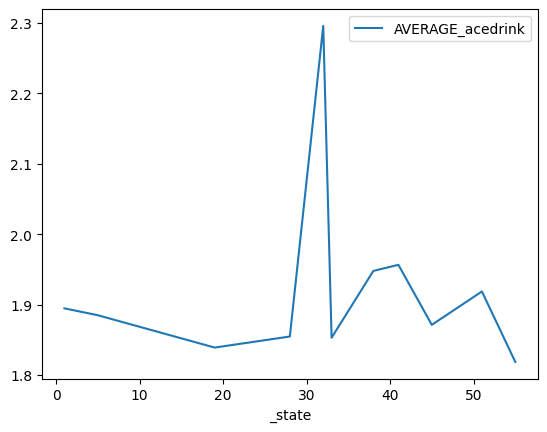

In [14]:
GROUPED_REDUCED_table.plot(y='AVERAGE_acedrink', use_index=True)

### Average percentage of U.S. children living with anyone who used illegal drugs or abused prescriptions:

<Axes: xlabel='_state'>

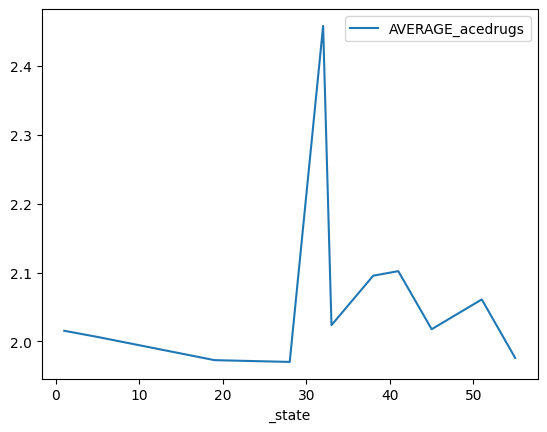

In [15]:
GROUPED_REDUCED_table.plot(y='AVERAGE_acedrugs', use_index=True)

### Average percentage of U.S. children living with anyone who served time in prison or jail:

<Axes: xlabel='_state'>

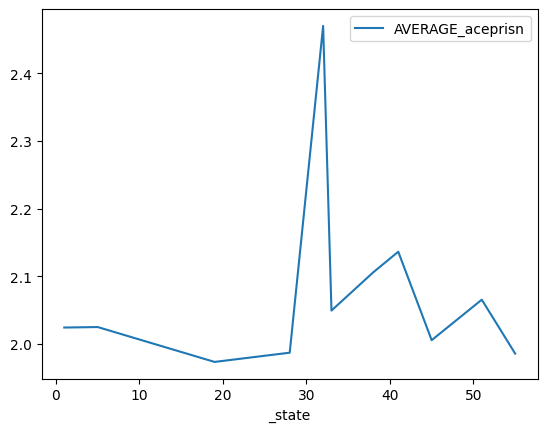

In [16]:
GROUPED_REDUCED_table.plot(y='AVERAGE_aceprisn', use_index=True)